## 长短时神经网络——Regression example

这里刚好有个小 tip，我们做 两个 model

即：是否对 y 进行标准化并不是一个**对错问题，且一般不对 y 进行标准化操作！**

值得注意的问题是：
1. 不对 y 进行标准化，收敛较慢，loss 可能会大一些，但精度有保证。
2. 对 y 进行标准化后，最后要对 y 反标准化，虽然收敛速度会加快，但容易过拟合，且在反标准化的过程中，会使精度丢失！

### model 1: 不对 y 进行标准化

In [35]:
import numpy as np
import pandas as pd

In [36]:
# 导入数据集
stock_file = './dataset/dataset.csv'
stock = pd.read_csv(stock_file)

In [37]:
stock.head(5)

,Month,values
0,Jan-49,112
1,Feb-49,118
2,Mar-49,132
3,Apr-49,129
4,May-49,121


In [38]:
label = stock['values']

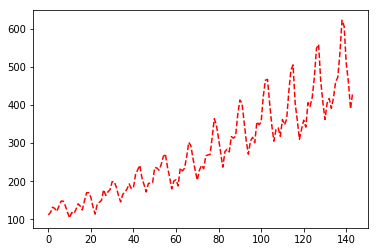

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(label)), label, 'r--')
plt.show()

In [40]:
dataset = stock.values[:, -1:]
print(dataset.dtype)
dataset.shape

object


(144, 1)

In [41]:
# Because the type of dataset is object, we need to change the type to 'float32'
dataset = dataset.astype(np.float32)
print(dataset.dtype)

float32


### 调用 tools 里面的 create_dataset 函数，构造适应的数据集，look_back 默认为 7，即 (x-7) 天预测第 x 天

构造数据集的时候，一般而言，会将 y 也作为 X 的一部分，故 need_label 默认为 True， 当然也可以设置为 False，不用 y 作为 input

In [42]:
from frames.tools import create_dataset

X, y = create_dataset(dataset, look_back=2, need_label=True)

In [43]:
print(X.shape)
print(y.shape)

(142, 2, 1)
(142, 1)


### 切割数据集

In [44]:
from frames.tools import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [45]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.dtype, y_train.dtype)

(113, 2, 1) (29, 2, 1) (113, 1) (29, 1)
float32 float32


### 调用 DeeplearningRegression 里面的 LSTM 框架

In [63]:
from frames.DeeplearningRegression import LSTM

'''
参数说明：
hidden_layers: 隐藏层神经元个数，传入 int
num_layers: lstm 层数，传入 int
learning rete: 学习率，这里可以是一个 float，也可以是一个 len=3 的 list，当 lr 是 list 的时候，采用梯度衰减策略
activate function: 激活函数，默认 relu，改激活函数输入小写字符串即可，如：'tanh','sigmoid'
dropout: 默认为 0，即不采用，这个参数是为了防止训练过拟合
epoch: 训练批次，默认 2000
batch_size: 默认 128

save_path: 默认'LSTM_Results'
is_standard: str
Dimensionality_reduction_method: 降维方法
'''
save_path = 'Example_results/Regression/LSTM_Results'
lstm = LSTM(learning_rate=[1e-2, 1e-5, 1e-7], num_layers=3, hidden_size=32, 
            epoch=10000, batch_size=256, save_path=save_path, 
            is_standard=False, Dimensionality_reduction_method='None') # 采用梯度衰减策略

In [64]:
lstm.fit(X_train, y_train, X_test, y_test)

Training... epoch: 100, loss: 86612.6171875
 Testing... epoch: 100, loss: 84681.203125 !
Training... epoch: 200, loss: 80010.6875
 Testing... epoch: 200, loss: 78019.2734375 !
Training... epoch: 300, loss: 73956.3515625
 Testing... epoch: 300, loss: 71905.828125 !
Training... epoch: 400, loss: 68359.6015625
 Testing... epoch: 400, loss: 66251.296875 !
Training... epoch: 500, loss: 63179.4296875
 Testing... epoch: 500, loss: 61014.6796875 !
Training... epoch: 600, loss: 58387.3125
 Testing... epoch: 600, loss: 56167.41796875 !
Training... epoch: 700, loss: 53959.78125
 Testing... epoch: 700, loss: 51686.078125 !
Training... epoch: 800, loss: 49876.05078125
 Testing... epoch: 800, loss: 47549.83203125 !
Training... epoch: 900, loss: 46117.0078125
 Testing... epoch: 900, loss: 43739.5859375 !
Training... epoch: 1000, loss: 42664.7265625
 Testing... epoch: 1000, loss: 40237.40625 !
Training... epoch: 1100, loss: 39502.16796875
 Testing... epoch: 1100, loss: 37026.265625 !
Training... epoch

Training... epoch: 7900, loss: 14771.8330078125
 Testing... epoch: 7900, loss: 11497.7041015625 !
Training... epoch: 8000, loss: 14771.8330078125
 Testing... epoch: 8000, loss: 11497.7041015625 !
Training... epoch: 8100, loss: 14771.8330078125
 Testing... epoch: 8100, loss: 11497.7041015625 !
Training... epoch: 8200, loss: 14771.8330078125
 Testing... epoch: 8200, loss: 11497.7041015625 !
Training... epoch: 8300, loss: 14771.8330078125
 Testing... epoch: 8300, loss: 11497.7041015625 !
Training... epoch: 8400, loss: 14771.8330078125
 Testing... epoch: 8400, loss: 11497.7041015625 !
Training... epoch: 8500, loss: 14771.8330078125
 Testing... epoch: 8500, loss: 11497.7041015625 !
Training... epoch: 8600, loss: 14771.8330078125
 Testing... epoch: 8600, loss: 11497.7041015625 !
Training... epoch: 8700, loss: 14771.8330078125
 Testing... epoch: 8700, loss: 11497.7041015625 !
Training... epoch: 8800, loss: 14771.8330078125
 Testing... epoch: 8800, loss: 11497.7041015625 !
Training... epoch: 8

### 调用 score 得到结果

In [65]:
lstm.score()

mse: 11497.705078125, rmse: 107.22735595703125, mae: 83.83660888671875, mape: 37.754037976264954, r2: -0.0006051091571499523, r2_adjusted: -0.03766455764445187, rmsle: 0.4132426679134369


### 调用 save 保存结果

In [66]:
lstm.save()

Save results success!
Save the value of prediction successfully!!
Save the picture successfully!
Save the picture of training loss successfully!
Save the picture of testing loss  successfully!


# 对 y 进行标准化操作

在机器学习里，认为 训练集（training set）的分布符合总体分布

In [50]:
# 对数据进行 标准化，将最后 百分之20，作为 测试集 
# 但是这里标准化后还是要合并，后续要给数据格式进行处理
train_size = int(len(dataset) * 0.8)
data_train = dataset[:train_size]
data_test = dataset[train_size:]

from sklearn.preprocessing import StandardScaler

standard = StandardScaler()
standard.fit(data_train)

data_train_standard = standard.transform(data_train)
data_test_standard = standard.transform(data_test)

# 合并
dataset_standard = np.concatenate((data_train_standard, data_test_standard), axis=0)
print('the shape of dataset_standard is: ', dataset_standard.shape)

the shape of dataset_standard is:  (144, 1)


In [51]:
from frames.tools import create_dataset

X, y = create_dataset(dataset_standard, look_back=2)

In [52]:
from frames.tools import train_test_split

X_train_standard, X_test_standard, y_train_standard, y_test_standard = train_test_split(X, y, test_size=0.2, random_state=19)

In [53]:
from frames.DeeplearningRegression import LSTM

'''
参数说明：
hidden_layers: 隐藏层神经元个数，传入 int
num_layers: lstm 层数，传入 int
learning rete: 学习率，这里可以是一个 float，也可以是一个 len=3 的 list，当 lr 是 list 的时候，采用梯度衰减策略
activate function: 激活函数，默认 relu，改激活函数输入小写字符串即可，如：'tanh','sigmoid'
dropout: 默认为 0，即不采用，这个参数是为了防止训练过拟合
epoch: 训练批次，默认 2000
batch_size: 默认 128

save_path: 默认'LSTM_Results'
is_standard: str
Dimensionality_reduction_method: 降维方法
'''
save_path = 'Example_results/Regression/LSTM2_Results'
lstm2 = LSTM(learning_rate=[1e-2, 1e-4, 1e-6], num_layers=2, hidden_size=32, 
            epoch=5000, batch_size=256, save_path=save_path, 
            is_standard=False, Dimensionality_reduction_method='None') # 采用梯度衰减策略

In [54]:
lstm2.fit(X_train_standard, y_train_standard, X_test_standard, y_test_standard)

Training... epoch: 100, loss: 0.0004980519297532737
 Testing... epoch: 100, loss: 0.21542604267597198 !
Training... epoch: 200, loss: 0.0003365442098584026
 Testing... epoch: 200, loss: 0.21347030997276306 !
Training... epoch: 300, loss: 0.0001928095007315278
 Testing... epoch: 300, loss: 0.21637271344661713 !
Training... epoch: 400, loss: 0.0006651930161751807
 Testing... epoch: 400, loss: 0.21776150166988373 !
Training... epoch: 500, loss: 0.0017281983746215701
 Testing... epoch: 500, loss: 0.2221584916114807 !
Training... epoch: 600, loss: 0.000508377852384001
 Testing... epoch: 600, loss: 0.2110598236322403 !
Training... epoch: 700, loss: 0.00023739668540656567
 Testing... epoch: 700, loss: 0.21619276702404022 !
Training... epoch: 800, loss: 0.0001454413286410272
 Testing... epoch: 800, loss: 0.21892528235912323 !
Training... epoch: 900, loss: 0.00011707716475939378
 Testing... epoch: 900, loss: 0.2194836586713791 !
Training... epoch: 1000, loss: 0.00010674427903722972
 Testing... 

### 反标准化

In [55]:
prediction_standard = lstm2.predict(X_test_standard)

prediction = standard.inverse_transform(prediction_standard)
y_true = standard.inverse_transform(y_test_standard)

from frames.tools import reg_calculate

reg_calculate(y_true, prediction)

mse: 3512.511474609375, rmse: 59.26644515991211, mae: 46.6807861328125, mape: 24.742209911346436, r2: 0.694318353709293, rmsle: 0.28955426812171936
if you wanna get the value of r2_adjusted, you can define the number of features, which is the third parameter.


(3512.5115,
 59.266445,
 46.680786,
 24.742209911346436,
 0.694318353709293,
 0.28955427)

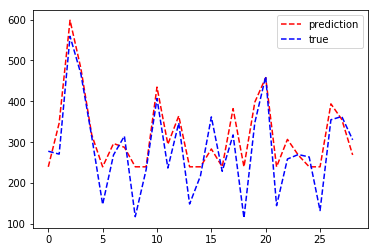

In [56]:
plt.plot(range(len(prediction)), prediction, 'r--', label='prediction')
plt.plot(range(len(y_true)), y_true, 'b--', label='true')
plt.legend()
plt.show()